# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# Pandas for data handling
import pandas as pd

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Shashikanth Senthil Kumar"
student_id = "25218722"
group_id = "9"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
business_use_case_description = """
Enable NBA teams and analysts to make data-driven decisions on draft prospects using interpretable tree-based models. 
Decision Trees provide clear, rule-based insights (e.g., if usage rate > X and BPM > Y, then draft likelihood is high), 
allowing scouts and coaches to visualize the decision process. 

Hypothesis:
A Decision Tree can predict whether a player will be drafted by learning simple if-then rules from their statistics. 
For example, players with high scoring and strong defensive stats are more likely to be drafted.
"""


In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
business_objectives = """
Accurate results will allow teams to prioritize scouting resources toward players with a higher probability of being drafted, improving the quality of draft selections and reducing wasted time and investment. 
Incorrect results, however, may cause teams to overlook valuable players or over-invest in players with a low chance of success, leading to financial loss, missed opportunities, and reduced team performance.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
stakeholders_expectations_explanations = """
The results will be used to guide scouting and recruitment strategies.
The primary users of the predictions will be NBA teams, talent scouts, sports analysts, and team management. 
Indirectly, players themselves and their agents may also be impacted, as draft predictions can influence career opportunities, negotiations, and visibility in the draft process.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# Load the datasets
X_train = pd.read_csv('../data_shash/X_train.csv')
y_train = pd.read_csv('../data_shash/y_train.csv')
X_val = pd.read_csv('../data_shash/X_val.csv')
y_val = pd.read_csv('../data_shash/y_val.csv')
X_test = pd.read_csv('../data_shash/X_test.csv')
y_test = pd.read_csv('../data_shash/y_test.csv')

---
## D. Feature Selection


### D.1 Final Selection of Features

In [15]:
# The final selected features are
features_list = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'ht', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'player_id', 'drafted'] 

### D.2 Final Selection of Features after feature engineering

In [16]:
# The final features after feature engineering
final_features = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'height_cm','Height_Impact', 'REB_per', 
       'FT_efficiency', 'player_id', 'drafted']

In [17]:
# <Student to fill this section>
feature_selection_explanations = """
We are using the same set of features as in Experiment 0 to maintain consistency and to ensure that model performance variations are due to the Decision Tree model and not from feature changes.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Use Datacheck to Ensure there is no Null values in the Datasets

In [19]:
# Import custom data checking function
from shash import datacheck

In [20]:
datacheck(X_train)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,41
Ortg,float64,0,0.0,1236
REB_per,float64,0,0.0,684
Height_Impact,float64,0,0.0,9781
height_cm,float64,0,0.0,30
pts,float64,0,0.0,3121
blk,float64,0,0.0,646
gbpm,float64,0,0.0,9752
bpm,float64,0,0.0,9747
porpag,float64,0,0.0,9751


In [21]:
datacheck(y_train)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,9780


In [22]:
datacheck(X_val)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,40
Ortg,float64,0,0.0,806
REB_per,float64,0,0.0,473
Height_Impact,float64,0,0.0,2446
height_cm,float64,0,0.0,25
pts,float64,0,0.0,1338
blk,float64,0,0.0,368
gbpm,float64,0,0.0,2445
bpm,float64,0,0.0,2445
porpag,float64,0,0.0,2443


In [23]:
datacheck(y_val)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,2444


In [24]:
datacheck(X_test)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,34
Ortg,float64,0,0.0,615
REB_per,float64,0,0.0,399
Height_Impact,float64,0,0.0,1292
height_cm,float64,0,0.0,22
pts,float64,0,0.0,808
blk,float64,0,0.0,244
gbpm,float64,0,0.0,1297
bpm,float64,0,0.0,1297
porpag,float64,0,0.0,1293


In [25]:
datacheck(y_test)

,dtype,missing_count,missing_percent,unique_values
player_id,object,0,0.0,1297
----------------,----------------,----------------,----------------,----------------
No duplicate,rows,found,in the,dataset


In [26]:
data_cleaning_explanations = """
Missing values can lead to inaccuracies in data analysis and model predictions. 
In this dataset, there were no missing values in any of the training, validation, or test sets ensuring completeness and reliability for further analysis.
Ignore the duplicates on test sets as they are reflecting the drafted player status.
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_explanations)

---
## F. Feature Engineering

In [28]:
feature_engineering_explanations = """
For this experiment (the Decision Tree Classifier), no feature engineering is performed. 
We are using the same features as the baseline model, and thus, no interaction terms or additional features were created. 
This maintains consistency in feature selection and ensures comparability of results between the models.
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_explanations)

---
## G. Data Preparation for Modeling

### G.1 Data Transformation "Flatten Target Variables"

In [30]:
# Check the shape of the y_train
y_train.shape

(9782, 1)

In [31]:
# Convert y dataframes to 1D arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

In [32]:
# Check the shape of the y_train
y_train.shape

(9782,)

In [33]:
data_transformation_1_explanations = """
The target variable 'drafted' was originally in a column vector shape (n_samples, 1), which is not compatible with many scikit-learn models. 
Flattening the target to a 1-dimensional array ensures proper input format for training and evaluation functions. 
This transformation allows models like Logistic Regression to correctly interpret the labels, avoids warnings during fitting, and ensures consistent behavior across cross-validation and predictions.
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets


The Datasets are already saved

---
## I. Selection of Performance Metrics


In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay,
    classification_report
)

In [36]:
performance_metrics_explanations = """
For this NBA draft prediction task, multiple performance metrics are considered to provide a well-rounded evaluation. 
Accuracy alone may not be sufficient, especially if the dataset is imbalanced (i.e., fewer players get drafted compared 
to those who don’t). Therefore, precision, recall, and F1-score are included to better capture the trade-offs between 
false positives and false negatives. 

- Precision: helps us understand how many of the players predicted as drafted are actually drafted, which is important 
  when we want to minimize false positives. 
- Recall tells us how many of the actual drafted players were correctly identified, which is critical if the goal is 
  to avoid missing potential talents. 
- F1-score balances precision and recall, making it a strong overall measure when both false positives and false negatives 
  are costly. 
- ROC-AUC is included to evaluate the model’s ability to discriminate between drafted and not drafted players across 
  different thresholds. 
- Confusion Matrix provides a clear breakdown of true positives, true negatives, false positives, and false negatives 
  for better interpretability. 

Using these combined metrics gives a more complete view of model performance and ensures that the evaluation is not biased 
towards a single aspect of prediction.
"""


In [37]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

In [38]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Initialize base model
dt = DecisionTreeClassifier(random_state=42)

In [40]:
algorithm_selection_explanations = """
Decision Trees are well-suited for this problem because they create simple, interpretable
if-then rules that are easy for analysts and coaches to understand. Unlike Logistic Regression,
Decision Trees can naturally capture non-linear relationships and feature interactions, which may
exist in player statistics. They also provide feature importance values, which are useful for
identifying the most influential stats for draft predictions.
"""

In [41]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters


In [42]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced']
}

In [43]:
hyperparameters_selection_explanations = """
These hyperparameters control the complexity and balance of the tree.
- max_depth: Prevents overfitting by limiting tree depth.
- min_samples_split & min_samples_leaf: Control how many samples are required to split nodes,
  which helps avoid overly specific splits.
- max_features: Ensures randomness in feature selection, improving generalization.
- class_weight: Balances the heavily skewed drafted vs non-drafted classes.
"""

In [44]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [45]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [46]:
# GridSearchCV setup with ROC AUC as metric
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Get best model
best_dt_model = grid_search_dt.best_estimator_

print("Best Parameters:", grid_search_dt.best_params_)
print("Best ROC AUC Score (CV):", grid_search_dt.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC AUC Score (CV): 0.8776356325465701


### J.4 Model Technical Performance


In [47]:
# Get predicted labels
y_pred_train = best_dt_model.predict(X_train)
y_pred_val = best_dt_model.predict(X_val)

# Get predicted probabilities (only needed for ROC AUC, log loss, etc.)
y_proba_train = best_dt_model.predict_proba(X_train)[:, 1]  # probability of class 1
y_proba_val = best_dt_model.predict_proba(X_val)[:, 1]  # probability of class 1

In [48]:
# Import Custom Package for evaluation
from shash import evaluate_model


--- Train Set Evaluation ---
Accuracy : 0.9527
Precision: 0.1489
Recall   : 1.0000
F1 Score : 0.2592
ROC AUC  : 0.9768

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      9701
         1.0       0.15      1.00      0.26        81

    accuracy                           0.95      9782
   macro avg       0.57      0.98      0.62      9782
weighted avg       0.99      0.95      0.97      9782

Confusion Matrix (Raw Counts):
[[9238  463]
 [   0   81]]


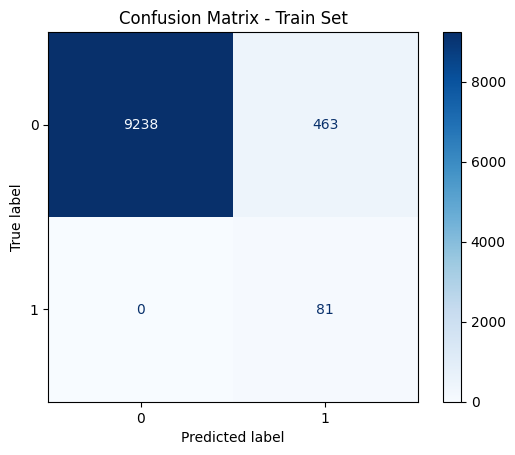

In [49]:
# Train evaluation
evaluate_model(y_train, y_pred_train, y_proba_train, dataset_name="Train Set")


--- Validation Set Evaluation ---
Accuracy : 0.9497
Precision: 0.0977
Recall   : 0.8125
F1 Score : 0.1745
ROC AUC  : 0.8801

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2430
         1.0       0.10      0.81      0.17        16

    accuracy                           0.95      2446
   macro avg       0.55      0.88      0.57      2446
weighted avg       0.99      0.95      0.97      2446

Confusion Matrix (Raw Counts):
[[2310  120]
 [   3   13]]


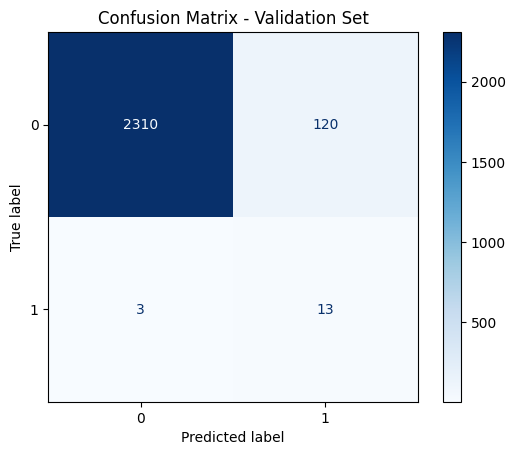

In [50]:
# Validation evaluation
evaluate_model(y_val, y_pred_val, y_proba_val, dataset_name="Validation Set")

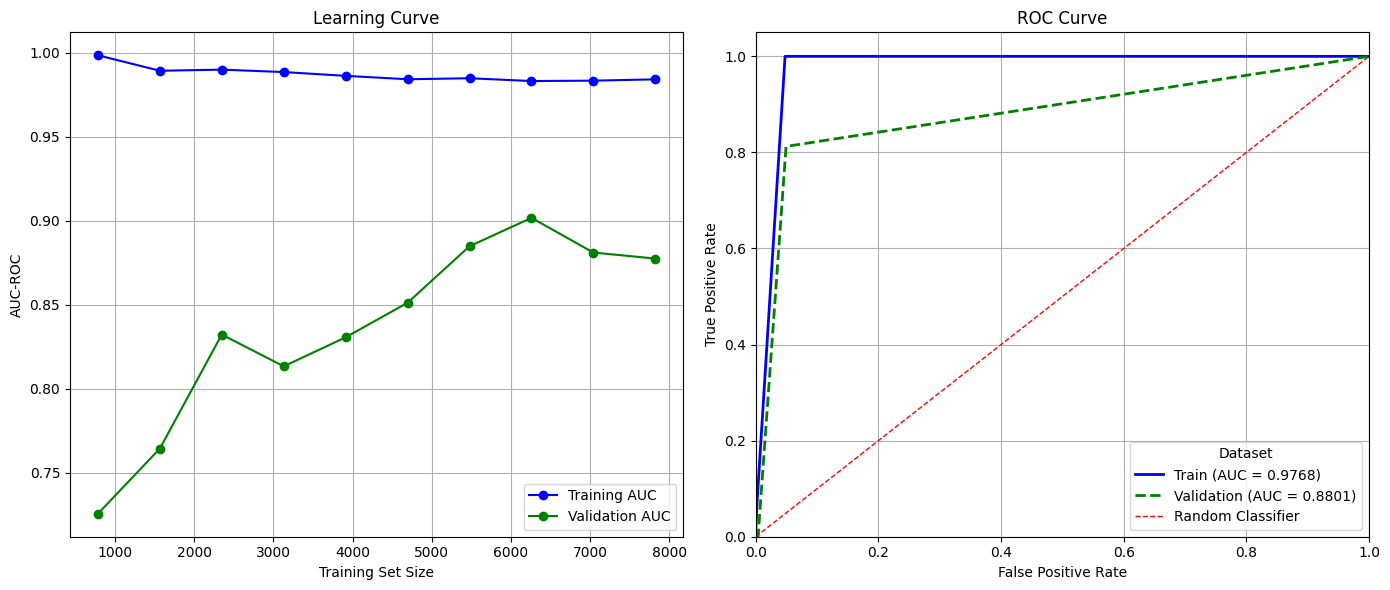

In [51]:
# Import roc_curve and learning_curve from sklearn
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_proba_val)
roc_auc_val = roc_auc_score(y_val, y_proba_val)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Learning Curve
ax[0].plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training AUC')
ax[0].plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation AUC')
ax[0].set_xlabel('Training Set Size')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_title('Learning Curve')
ax[0].legend()
ax[0].grid(True)

# ROC Curve
ax[1].plot(fpr_train, tpr_train, color='blue', lw=2, linestyle='-', label=f'Train (AUC = {roc_auc_train:.4f})')
ax[1].plot(fpr_val, tpr_val, color='green', lw=2, linestyle='--', label=f'Validation (AUC = {roc_auc_val:.4f})')
ax[1].plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend(title='Dataset', loc='lower right')
ax[1].grid(True)

plt.tight_layout()

In [52]:
# Get probabilities for the positive class from best model for the test dataset(X_test)
dt_test_probs = best_dt_model.predict_proba(X_test)[:, 1]

In [53]:
# Create output DataFrame with player_id and baseline probabilities
dt_output_df = pd.DataFrame({
    'player_id': y_test['player_id'],
    'drafted': dt_test_probs
})

In [54]:
# Save to CSV
dt_output_df.to_csv("../predictions_shash/test_predictions_dt.csv", index=False)

In [55]:
model_performance_explanations = """
The Decision Tree (max_depth=5) achieved strong ranking ability (ROC AUC ≈0.88) and high recall for drafted players, 
making it effective at identifying potential prospects. However, precision is low, meaning many false positives. 
The model remains interpretable and avoids severe overfitting, but requires threshold tuning or ensemble methods 
to better balance recall and precision.
"""

In [56]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

In [57]:
# Feature importance analysis
features = X_train.columns
importance = best_dt_model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

In [58]:
print("Feature Importances:")
print(feat_df)

Feature Importances:
          Feature    Importance
13         porpag  8.144735e-01
16            blk  7.598541e-02
15           gbpm  4.126108e-02
2             usg  3.224313e-02
18      height_cm  2.293947e-02
3         ORB_per  7.550281e-03
6          TO_per  5.547080e-03
12            ftr  1.147808e-15
5         AST_per  1.603537e-16
0              GP  0.000000e+00
14            bpm  0.000000e+00
20        REB_per  0.000000e+00
19  Height_Impact  0.000000e+00
17            pts  0.000000e+00
11        stl_per  0.000000e+00
1            Ortg  0.000000e+00
10         TP_per  0.000000e+00
9             TPM  0.000000e+00
8        twoP_per  0.000000e+00
7          FT_per  0.000000e+00
4         DRB_per  0.000000e+00
21  FT_efficiency  0.000000e+00


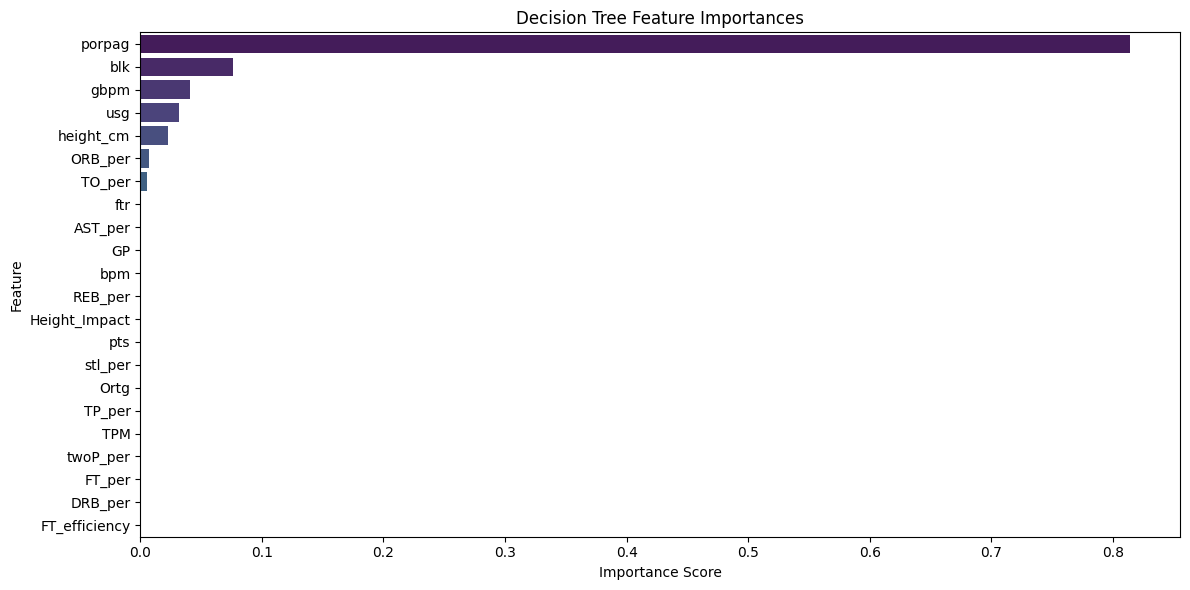

In [59]:
# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

In [60]:
# <Student to fill this section>
business_impacts_explanations = """
The decision tree highlights that 'porpag' (Points Over Replacement Per Adjusted Game) 
is the strongest predictor of draft likelihood, followed by 'blk' (blocks), 'gbpm' (box plus-minus), 
and 'usg' (usage rate). This indicates that teams primarily value all-around player efficiency, 
defensive presence, and contribution relative to peers.

Business Impact:
- Correct predictions help scouts focus on players who consistently outperform replacements, 
  ensuring smarter draft investments and stronger long-term roster building.
- Misclassifying 'porpag' has the highest business risk, as undervaluing efficiency could lead to 
  overlooking players who drive winning outcomes, impacting both team success and fan engagement.
- Misjudging 'blk' or 'gbpm' could result in underestimating defensive or overall impact players, 
  leading to missed opportunities in building balanced lineups.
- Prioritizing the high-importance metrics ensures reduced scouting costs, more accurate shortlists, 
  and improved return on investment in draft picks.
"""

In [61]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [62]:
experiment_outcome = "Hypothesis Confirmed"  # Decision Tree captured meaningful draft patterns

In [63]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [64]:
# <Student to fill this section>
experiment_results_explanations = """
The Decision Tree model was able to distinguish drafted vs. non-drafted players by learning simple if-then rules from their statistics, achieving good ROC AUC and recall for the minority class. 
Key predictors such as porpag, blk, and gbpm were identified, providing interpretable insights for scouts and analysts. 

New insights include understanding which player statistics most strongly influence draft likelihood and how thresholds in the tree capture draft decisions. 
This validates the approach and supports the hypothesis. 

Next steps:
1. Tune Random Forest hyperparameters such as n_estimators, max_depth, min_samples_split, and max_features to optimize model performance (expected uplift: high).  
2. Perform feature importance analysis to identify which player statistics contribute most to draft predictions and refine the feature set if needed (expected uplift: medium).  
3. Compare Random Forest performance against previous models (Logistic Regression, Decision Tree) using metrics like ROC AUC, F1-score, and recall for minority class to select the best model for deployment (expected uplift: high).  
"""

In [65]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)